In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.setrecursionlimit(10**9)

In [2]:
data = pd.read_csv('c75_research_data_202212.csv', low_memory = False)

## 데이터 전처리

In [3]:
# Pick female patients. 
# There are only 2 male patients out of 21246 patients.

data = data.loc[data['sex'] == 'F']

In [4]:
# drop columns as followings
# hispanic_yn: ratio of Y is too small = 640/21246 = 3% 그리고 차라리 race로 하는게 나을듯.

columns_drop = ['report_start_dt', 'report_end_dt', 'clinic_id', 'clinic_name','clinic_2_id', 'last_brc_screen_dt', 
                'last_bcs_month_cnt', 'denominator_yn', 'pseudo_pat_id', 'race_txt', 'hispanic_yn', 'sex', 
                'smoking_yn', 'drinking_yn', 'drinking_txt', 'last_mh_service_dt', 'prior_pregnancy_yn', 'PT_STATE', 'PT_ZIP',
                'ruca_ct_2_cd', 'ruca_zcta_1_cd', 'ruca_zcta_2_cd', 'RUCC_2013', 'state_adi_rank_num',
                'brc_c500_onset_dt', 'brc_c501_onset_dt', 'brc_c502_onset_dt', 'brc_c503_onset_dt', 'brc_c504_onset_dt', 
                'brc_c505_onset_dt', 'brc_c506_onset_dt', 'brc_c507_onset_dt', 'brc_c508_onset_dt', 'brc_c509_onset_dt', 
                'dx_c507_yn', 'RR_Star1', 'AbsRisk_Avg', 'overall_scale_num']

data = data.drop(columns = columns_drop, axis = 1)

In [5]:
# Replace categorical data (y/n) into binary data, replace NaN data into 0

data = data.replace({'numerator_yn' : {'Y' : 1}})
data = data.replace({'numerator_yn' : {'N' : 0}})

data = data.replace({'nulliparity_yn' : {np.nan : 1}})
data = data.replace({'nulliparity_yn' : {'N' : 0}})

data = data.replace({'uac_yn' : {'Y' : 1}})
data = data.replace({'uac_yn' : {'N' : 0}})

data = data.replace({'pa_urban_county_yn' : {'Y' : 1}})
data = data.replace({'pa_urban_county_yn' : {'N' : 0}})

In [6]:
# There is no data in 'dx_c507_yn' so I dropped early.
# Replace dx_c500_yn ~ dx_c509_yn into binary data.

dx_list = ['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
           'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']

for i in range(len(dx_list)):
    data = data.replace({dx_list[i] : {'Y' : 1}})
    data = data.replace({dx_list[i] : {np.nan : 0}})

In [7]:
# Columns in dx_list has too small ratio of Y. They are all less than 5%.
# There is no data in 'dx_c507_yn' so I dropped (in the previous cell)

#dx_list = ['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
#           'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']

#data = data.drop(columns = dx_list, axis = 1)

In [8]:
# Some of disease_list has too small ratio of Y. If there are less than 15% of data ratio, I'll erase them.
# obesity_yn는 last_bmi_num과 상관관계가 너무 높다. 그러니 drop. 의미적으로 볼 때 obesity_yn을 drop하는게 맞아보인다.

drop_disease_list = ['alcohol_drug_disorder_yn', 'autism_yn', 'bipolar_disorder_yn', 'cancer_yn', 'chf_cad_yn', 
                     'ckd_yn', 'opioid_yn', 'dementia_cognitive_disorder_yn', 'homeless_yn', 
                     'intrptr_needed_yn', 'medicare_age_less_65_yn', 'no_show_yn', 'obesity_yn', 'schizophrenia_yn', 
                     'sleeping_disorder_yn', 'transplant_yn', 'uninsured_yn', 'unspecific_psych_yn', 
                     'developmental_delay_yn', 'eating_disorder_yn', 'learning_disability_yn', 'gender_identity_disorder_yn']

data = data.drop(columns = drop_disease_list, axis = 1)

In [9]:
disease_list = ['asthma_copd_cf_yn', 'chronic_pain_yn', 'depression_anxiety_yn', 'diabetes_yn', 'med_order_gt_10_yn', 'htn_yn']

for i in range(len(disease_list)):
    data = data.replace({disease_list[i] : {'Y' : 1}})
    data = data.replace({disease_list[i] : {np.nan : 0}})

In [10]:
#disease_list = ['alcohol_drug_disorder_yn', 'asthma_copd_cf_yn', 'autism_yn', 'bipolar_disorder_yn', 'cancer_yn', 'chf_cad_yn', 
#                'ckd_yn', 'chronic_pain_yn', 'opioid_yn', 'dementia_cognitive_disorder_yn', 'depression_anxiety_yn', 'diabetes_yn', 
#                'homeless_yn', 'intrptr_needed_yn', 'medicare_age_less_65_yn', 'no_show_yn', 'obesity_yn', 'schizophrenia_yn', 
#                'sleeping_disorder_yn', 'med_order_gt_10_yn', 'transplant_yn', 'uninsured_yn', 'unspecific_psych_yn', 
#                'developmental_delay_yn', 'eating_disorder_yn', 'learning_disability_yn', 'gender_identity_disorder_yn', 'htn_yn']

In [11]:
# 서로 상관계수가 0.9씩이나 됨. brc_site_01_cd 빼고 다 지우자

brc_site_list = ['brc_site_01_cd', 'brc_site_02_cd', 'brc_site_03_cd', 'brc_site_04_cd', 'brc_site_05_cd', 'brc_site_06_cd', 
                 'brc_site_07_cd', 'brc_site_08_cd', 'brc_site_09_cd', 'brc_site_10_cd', 'brc_site_11_cd', 'brc_site_12_cd', 
                 'brc_site_13_cd', 'brc_site_14_cd', 'brc_site_15_cd', 'brc_site_16_cd', 'brc_site_17_cd', 'brc_site_18_cd', 
                 'brc_site_19_cd', 'brc_site_20_cd', 'brc_site_21_cd', 'brc_site_22_cd', 'brc_site_23_cd']

data = data.drop(columns = brc_site_list, axis = 1)

In [12]:
#collinearity_variables_list = ['vehicle_1_pct', 'vehicle_2_pct', 'vehicle_3_plus_pct', 
#                               'edu_less_hs_pct', 'edu_hs_pct', 'edu_some_col_pct', 'edu_ba_pct']

collinearity_variables_list = ['vehicle_3_plus_pct', 'edu_ba_pct']

data = data.drop(columns = collinearity_variables_list, axis = 1)

In [13]:
# Imputation 인데, vehicle_1_pct에 없는 데이터가 다른 vehicle 데이터 모두에게 없어서, 그냥 missing데이터 자체를 drop 하기로 했다.

#data.fillna({'vehicle_1_pct': data['vehicle_1_pct'].mean()}, inplace=True)
#data.fillna({'vehicle_2_pct': data['vehicle_2_pct'].mean()}, inplace=True)
#data.fillna({'vehicle_3_plus_pct': data['vehicle_3_plus_pct'].mean}, inplace=True)

In [14]:
#data.fillna({'edu_less_hs_pct': data['edu_less_hs_pct'].mean()}, inplace=True)
#data.fillna({'edu_hs_pct': data['edu_hs_pct'].mean()}, inplace=True)
#data.fillna({'edu_some_col_pct': data['edu_some_col_pct'].mean()}, inplace=True)
#data.fillna({'edu_ba_pct': data['edu_ba_pct'].mean()}, inplace=True)

In [15]:
# vehicle_0_pct = nan 인 행에 같이 결측값이 있는 애들이 굉장히 많았음.

data = data.dropna(subset = ['vehicle_0_pct'])

In [16]:
data = data.dropna(subset = ['smoking_txt'])

In [17]:
# 원래는 RR_Start2 를 mode()로 imputate하려고 했는데, 13개만 missing이라 그냥 지움

#data.fillna({'RR_Star2': data['RR_Star2'].mode()[0]}, inplace=True) # 21233 / 21246

data = data.dropna(subset = ['RR_Star2'])

In [18]:
data.fillna({'last_bmi_num': data['last_bmi_num'].mode()[0]}, inplace=True)

In [19]:
# ruce_ct_1_cd는 non_nan이 15627 / 21246 이라 drop하긴 좀 그렇고, 1~10 까지의 natural number이라 mode()로 넣어줬다.

data.fillna({'ruca_ct_1_cd': data['ruca_ct_1_cd'].mode()[0]}, inplace=True)

In [20]:
# challenging_wt_num은 non_nan이 19419 / 21246 이라 drop하기 조금 애매하고, 다른 것들 drop 했을 때 여전히 missing data가 있었다.
# continuous variable이라 mode말고 mean으로 inpute해줬다.

data.fillna({'challenging_wt_num': data['challenging_wt_num'].mean()}, inplace=True)

# 정규화 해주자
#data['challenging_wt_num'] = (data['challenging_wt_num'] - min(data['challenging_wt_num'])) / (max(data['challenging_wt_num']) - min(data['challenging_wt_num']))

#data = data.drop(columns = 'challenging_wt_num', axis = 1)

In [21]:
# 이걸 해주지 않으면, One-hot encoding시 문제가 생긴다. 반드시 해줘야 한다!!!

data = data.reset_index(drop=True)

## 여기까지 불필요한 Columns 제거와 NaN은 모두 처리했다.
## 이제부터 Categorical variables에 대해 One-hot encoding 수행

In [22]:
# One-hot encoding for 'race_2_txt', 'payer_category_txt', 'smoking_txt'

# ------------------------------------------------------------------------------------------------------------------------------
# data = pd.get_dummies(data)
# 이렇게 원핫인코딩을 하면 7개의 category에 대해 7개의 columns를 생성한다. 이렇게 하면 다중공선성이 발생할 수 밖에 없다. 
# 7개의 categories에 대해서는 그보다 한 개 적은 6개를 생성해야 한다. 
# 만약 7개면 마지막 1개의 column은 나머지 6개의 columns의 선형결합으로 생성이 가능하기 때문이다. (Chen의 조언)
# ------------------------------------------------------------------------------------------------------------------------------

# ------------------------------------------------------------------------------------------------------------------------------
# 원핫인코딩을 하니까 Multicollinearity가 발생해. 너무심각함. 그냥 숫자로 바꿔주자. 
# -> 그려려고 했으나, Chen의 조언을 듣고 다시 원핫인코딩 하기로 했음.
# ------------------------------------------------------------------------------------------------------------------------------

In [23]:
data = pd.get_dummies(data)

In [24]:
onehot_list = ['race_2_txt_1: White', 'payer_category_txt_Commercial', 'smoking_txt_Never']

data = data.drop(columns = onehot_list, axis = 1)

## Correlation Coefficient Matrix 및 VIF 확인

In [25]:
#dx_list = ['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
#           'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']

#for i in range(len(dx_list)):
#    data = data.replace({dx_list[i] : {'Y' : 1}})
#    data = data.replace({dx_list[i] : {np.nan : 0}})
    
#dx_data = data[['dx_c500_yn', 'dx_c501_yn', 'dx_c502_yn', 'dx_c503_yn', 'dx_c504_yn', 
#                'dx_c505_yn', 'dx_c506_yn', 'dx_c508_yn', 'dx_c509_yn']] 
#    
#cols = dx_data.columns
#cm = np.corrcoef(dx_data.values.T)
#f, ax = plt.subplots(figsize=(10, 8)) # figure size 조절
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
#|plt.show()

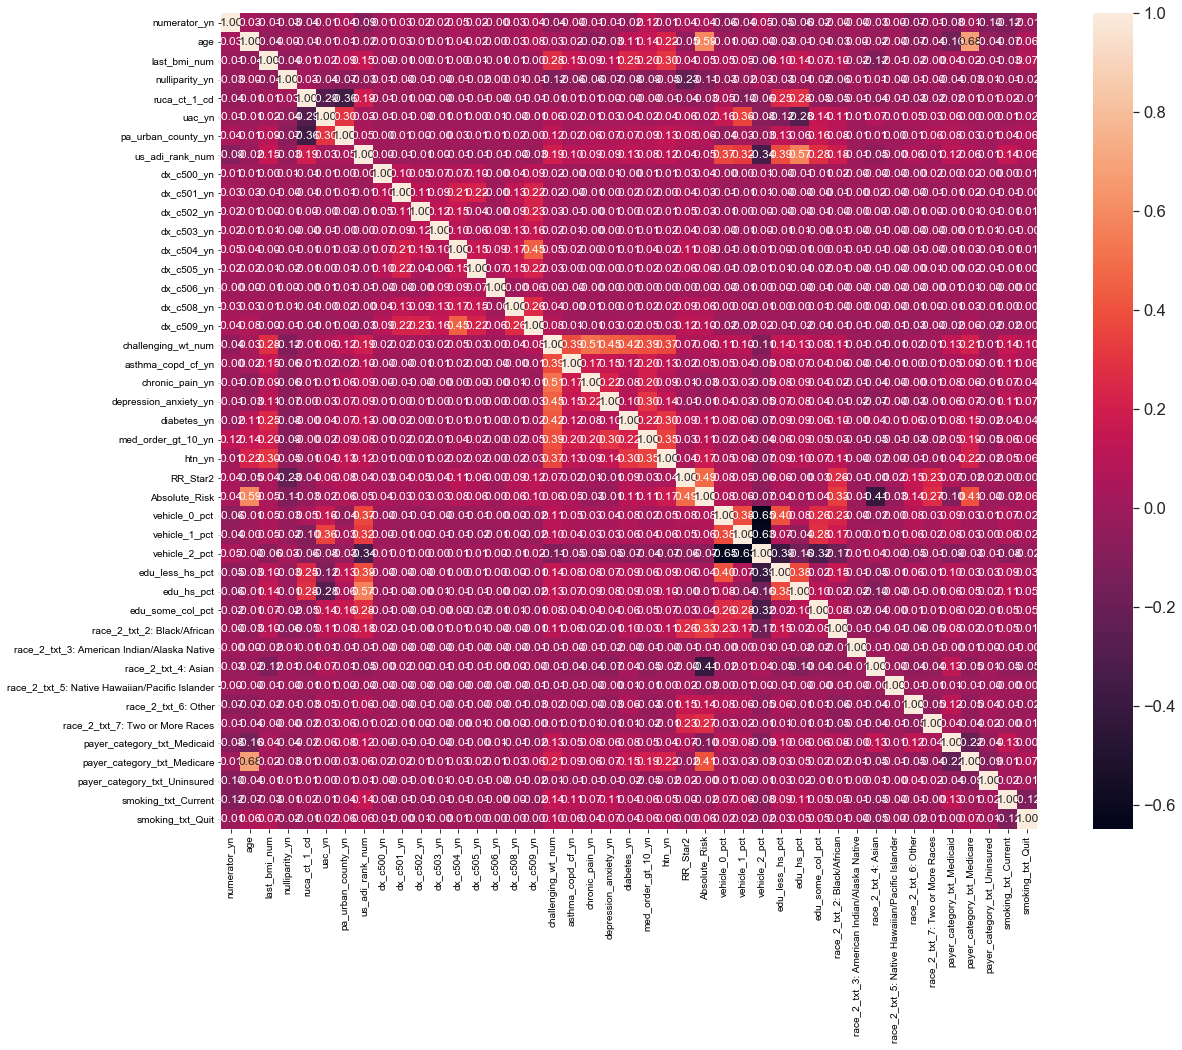

In [26]:
# Check Correlation Coefficient of each variables

cols = data.columns
cm = np.corrcoef(data.values.T)
f, ax = plt.subplots(figsize=(20, 15)) # figure size 조절
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['features'] = data.columns
vif = vif.sort_values('VIF Factor').reset_index(drop = True)
vif

,VIF Factor,features
0,1.005840,race_2_txt_3: American Indian/Alaska Native
1,1.009709,race_2_txt_5: Native Hawaiian/Pacific Islander
2,1.022370,dx_c506_yn
3,1.028636,dx_c500_yn
4,1.050380,payer_category_txt_Uninsured
5,1.057272,dx_c503_yn
6,1.074297,dx_c502_yn
7,1.106876,dx_c508_yn
8,1.107254,dx_c505_yn
9,1.118258,dx_c501_yn


## Data distribution 확인: 정확한 distribution은 Statistics File에서 확인

In [28]:
data.to_csv('data_cleaned.csv', index = False)

# Model

In [29]:
# Import Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Import Supplementary Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn import metrics

In [30]:
ydata = data['numerator_yn']
xdata = data.drop(['numerator_yn'], axis=1, inplace=False)

In [31]:
# Splitting dataset into train : test = 70 : 30
# xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state = 1)

In [32]:
# Set the number of Folds
cv = KFold(n_splits = 10)

In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    #plt.xticks(np.arange(start, end, 0.1))
    #plt.xlim([-0.01,1.01]); plt.ylim([-0.01,1.01])
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Sensitivity )')
    plt.legend()
    plt.show()


In [35]:
logreg = LogisticRegression(max_iter = 5000, random_state = 100)

logreg_scores = cross_val_score(logreg, xdata, ydata, scoring = 'roc_auc', cv = 10)
logreg.fit(xdata, ydata)

print('Each 10-Fold Cross Validation Score: \n', pd.Series(logreg_scores),'\n')
print('Mean score: \n', logreg_scores.mean(),'\n')

Each 10-Fold Cross Validation Score: 
 0    0.650033
1    0.640577
2    0.625668
3    0.634142
4    0.617897
5    0.642941
6    0.659517
7    0.683167
8    0.638146
9    0.677564
dtype: float64 

Mean score: 
 0.6469651889133845 



                                               params  mean_test_score  \
0   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.636819   
1   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...              NaN   
2   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.636825   
3   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.634895   
4   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.633851   
5   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.636182   
6   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.636142   
7   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.636242   
8   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.634663   
9   {'C': 0.1, 'fit_intercept': True, 'max_iter': ...         0.633473   
10  {'C': 0.1, 'fit_intercept': False, 'max_iter':...         0.636992   
11  {'C': 0.1, 'fit_intercept': False, 'max_iter':...              NaN   
12  {'C': 0.1, 'fit_intercept': False,

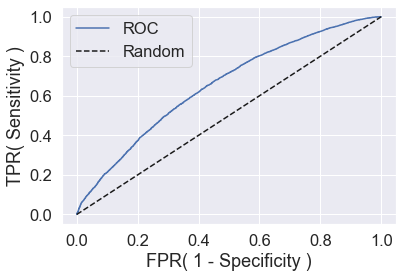

None
0.6527679791853336


In [75]:
logreg = LogisticRegression()
parameters_logreg = {'penalty': ['none', 'l2'], 
                     'fit_intercept': [True, False], 
                     'C' : [0.1, 1, 10], 
                     'max_iter': [7500],
                     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
                    }

grid_logreg = GridSearchCV(logreg, parameters_logreg, cv = cv, scoring='roc_auc', refit = True, n_jobs = -1)
grid_logreg.fit(xdata, ydata)

scores_logreg = pd.DataFrame(grid_logreg.cv_results_)
scores_logreg = scores_logreg[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 
                               'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 
                               'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score']]

print(scores_logreg.sort_values(by='rank_test_score'))
print("The ROC Curve for Logistic Regression")
print(roc_curve_plot(ydata, grid_logreg.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_logreg.predict_proba(xdata)[:, 1]))

In [79]:
scores_logreg = scores_logreg[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 
               'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 
               'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score']]

scores_logreg.sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
55,"{'C': 10, 'fit_intercept': False, 'max_iter': ...",0.637028,1,0.648496,0.633711,0.623518,0.604971,0.622075,0.636696,0.642516,0.655812,0.638645,0.663841
50,"{'C': 10, 'fit_intercept': False, 'max_iter': ...",0.636992,2,0.647931,0.633433,0.623625,0.604941,0.622215,0.636807,0.642755,0.655388,0.638836,0.663990
30,"{'C': 1, 'fit_intercept': False, 'max_iter': 7...",0.636992,2,0.647931,0.633433,0.623625,0.604941,0.622215,0.636807,0.642755,0.655388,0.638836,0.663990
10,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.636992,2,0.647931,0.633433,0.623625,0.604941,0.622215,0.636807,0.642755,0.655388,0.638836,0.663990
26,"{'C': 1, 'fit_intercept': True, 'max_iter': 75...",0.636836,5,0.649036,0.632969,0.624231,0.604269,0.622183,0.636056,0.641947,0.655801,0.638293,0.663576
37,"{'C': 1, 'fit_intercept': False, 'max_iter': 7...",0.636836,6,0.648632,0.633136,0.623213,0.604739,0.621955,0.636356,0.642664,0.655706,0.638217,0.663741
46,"{'C': 10, 'fit_intercept': True, 'max_iter': 7...",0.636833,7,0.649264,0.632706,0.623426,0.603839,0.622373,0.636051,0.641868,0.655700,0.639436,0.663666
57,"{'C': 10, 'fit_intercept': False, 'max_iter': ...",0.636830,8,0.648664,0.633230,0.623356,0.604666,0.622103,0.636375,0.642723,0.655549,0.638022,0.663611
47,"{'C': 10, 'fit_intercept': True, 'max_iter': 7...",0.636829,9,0.648750,0.633193,0.623636,0.604284,0.622356,0.636126,0.642742,0.655310,0.638547,0.663350
22,"{'C': 1, 'fit_intercept': True, 'max_iter': 75...",0.636825,10,0.648726,0.633201,0.623639,0.604312,0.622400,0.636099,0.642714,0.655303,0.638522,0.663333


                                               params  mean_test_score  \
29  {'bootstrap': True, 'max_depth': 20, 'max_feat...         0.641685   
15  {'bootstrap': True, 'max_depth': 20, 'max_feat...         0.641411   
13  {'bootstrap': True, 'max_depth': 20, 'max_feat...         0.641261   
25  {'bootstrap': True, 'max_depth': 20, 'max_feat...         0.641110   
14  {'bootstrap': True, 'max_depth': 20, 'max_feat...         0.641055   

    rank_test_score  split0_test_score  split1_test_score  split2_test_score  \
29                1           0.662824           0.649001           0.634208   
15                2           0.665049           0.650474           0.632076   
13                3           0.664246           0.652511           0.631400   
25                4           0.661158           0.651930           0.629244   
14                5           0.664124           0.650291           0.631609   

    split3_test_score  split4_test_score  split5_test_score  \
29         

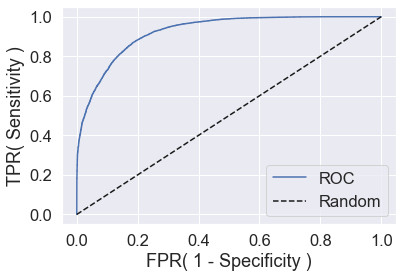

None
0.9244463211000458


In [82]:
rf = RandomForestClassifier()
parameters_rf = {'bootstrap': [True, False],
                 'max_depth': [20, 30, 40, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [2, 4],
                 'min_samples_split': [5, 10],
                 'n_estimators': [200, 400, 600, 800]
                }

grid_rf = GridSearchCV(rf, parameters_rf, cv = cv, scoring='roc_auc', refit = True, n_jobs = -1)
grid_rf.fit(xdata, ydata)

scores_rf = pd.DataFrame(grid_rf.cv_results_)
scores_rf = scores_rf[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 
                       'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 
                       'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score']]

print(scores_rf.sort_values(by='rank_test_score').head())
print("The ROC Curve for Random Forest")
print(roc_curve_plot(ydata, grid_rf.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_rf.predict_proba(xdata)[:, 1]))

                                                params  mean_test_score  \
569  {'colsample_bylevel': 0.7, 'colsample_bytree':...         0.655414   
893  {'colsample_bylevel': 0.9, 'colsample_bytree':...         0.655184   
353  {'colsample_bylevel': 0.7, 'colsample_bytree':...         0.654853   
677  {'colsample_bylevel': 0.9, 'colsample_bytree':...         0.654640   
676  {'colsample_bylevel': 0.9, 'colsample_bytree':...         0.654427   
..                                                 ...              ...   
642  {'colsample_bylevel': 0.7, 'colsample_bytree':...         0.580674   
312  {'colsample_bylevel': 0.5, 'colsample_bytree':...         0.580501   
534  {'colsample_bylevel': 0.7, 'colsample_bytree':...         0.579384   
318  {'colsample_bylevel': 0.5, 'colsample_bytree':...         0.579121   
321  {'colsample_bylevel': 0.5, 'colsample_bytree':...         0.578887   

     rank_test_score  split0_test_score  split1_test_score  split2_test_score  \
569               

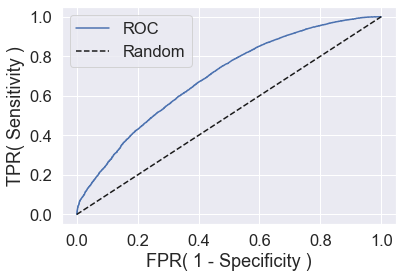

None
0.6927548719956244


In [90]:
xgb = XGBClassifier()
parameters_xgb = {'max_depth': [3, 6, 10],
                  'learning_rate': [0.01, 0.1, 0.2, 0.3],
                  'subsample': [0.5, 0.7, 0.9],
                  'colsample_bytree': [0.5, 0.7, 0.9],
                  'colsample_bylevel': [0.5, 0.7, 0.9],
                  'n_estimators': [100, 250, 500],
                 }

grid_xgb = GridSearchCV(xgb, parameters_xgb, cv = cv, scoring='roc_auc', refit = True, n_jobs = -1)
grid_xgb.fit(xdata, ydata)

scores_xgb = pd.DataFrame(grid_xgb.cv_results_)
scores_xgb = scores_xgb[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 
                         'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 
                         'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score']]

print(scores_xgb.sort_values(by='rank_test_score'))
print("The ROC Curve for XGBoost")
print(roc_curve_plot(ydata, grid_xgb.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_xgb.predict_proba(xdata)[:, 1]))

In [281]:
nn = MLPClassifier()
parameters_nn = {'penalty': ['none', 'l2'], 
                     'fit_intercept': [True, False], 
                     'C' : [0.1, 1, 10], 
                     'max_iter': [7500],
                     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}

grid_nn = GridSearchCV(nn, parameters_nn, cv = cv, scoring='roc_auc', refit = True, n_jobs = -1)
grid_nn.fit(xdata, ydata)

scores_nn = pd.DataFrame(grid_nn.cv_results_)
scores_nn = scores_nn[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 
                       'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 
                       'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score']]

print(scores_nn.sort_values(by='rank_test_score'))
print("The ROC Curve for Neural Network")
print(roc_curve_plot(ydata, grid_nn.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_nn.predict_proba(xdata)[:, 1]))

Each 10-Fold Cross Validation Score: 
 0    0.638753
1    0.627234
2    0.626263
3    0.587944
4    0.578194
5    0.617640
6    0.645833
7    0.661772
8    0.610693
9    0.669269
dtype: float64 

Mean score: 
 0.6263595180558257 



## 위쪽은 Chen 조언대로 Cross Validation 했을 경우

In [226]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(xdata, ydata)

C:\Users\LG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [227]:
pred_logreg = logreg.predict(xtest)
acc_logreg = accuracy_score(ytest, pred_logreg)
f1_logreg = metrics.f1_score(ytest, pred_logreg)

print("The Accuracy Score for Logistic Regression is: " + str(acc_logreg))
print("The F1 Score for Logistic Regression is: " + str(f1_logreg))

The Accuracy Score for Logistic Regression is: 0.6921810699588478
The F1 Score for Logistic Regression is: 0.8125876929244337


The ROC Curve for Logistic Regression


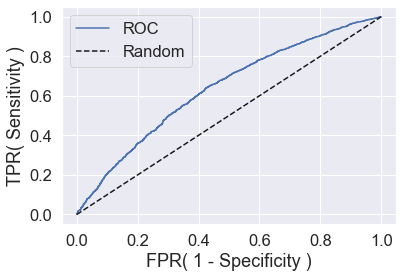

None
0.6361634127071422


In [228]:
print("The ROC Curve for Logistic Regression")
print(roc_curve_plot(ytest, logreg.predict_proba(xtest)[:, 1]))
print(roc_auc_score(ytest, logreg.predict_proba(xtest)[:, 1]))

In [1253]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [1254]:
pred_rf = rf.predict(xtest)
acc_rf = accuracy_score(ytest, pred_rf)
f1_rf = metrics.f1_score(ytest, pred_rf)

print("The Accuracy Score for Random Forest is: " + str(acc_rf))
print("The F1 Score for Random Forest is: " + str(f1_rf))

The Accuracy Score for Random Forest is: 0.6648559670781893
The F1 Score for Random Forest is: 0.7775349650349651


The ROC Curve for Random Forest


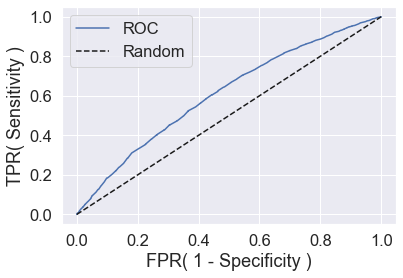

None
0.6093741722702546


In [1255]:
print("The ROC Curve for Random Forest")
print(roc_curve_plot(ytest, rf.predict_proba(xtest)[:, 1]))
print(roc_auc_score(ytest, rf.predict_proba(xtest)[:, 1]))

In [1256]:
# XGBoost without parameters
xgb_wo_param = XGBClassifier()
xgb_wo_param.fit(xtrain, ytrain)

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:16:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1257]:
pred_xgb_wo_param = xgb_wo_param.predict(xtest)
acc_xgb_wo_param = accuracy_score(ytest, pred_xgb_wo_param)
f1_xgb_wo_param = metrics.f1_score(ytest, pred_xgb_wo_param)

print("The Accuracy Score for XGBoost is: " + str(acc_xgb_wo_param))
print("The F1 Score for XGBoost is: " + str(f1_xgb_wo_param))

The Accuracy Score for XGBoost is: 0.679835390946502
The F1 Score for XGBoost is: 0.7897524591936007


The ROC Curve for XGBoost


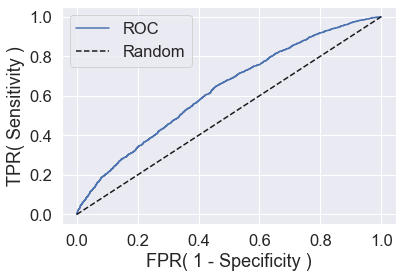

None
0.628205560254746


In [1258]:
print("The ROC Curve for XGBoost")
print(roc_curve_plot(ytest, xgb_wo_param.predict_proba(xtest)[:, 1]))
print(roc_auc_score(ytest, xgb_wo_param.predict_proba(xtest)[:, 1]))

In [1262]:
# XGBoost
# https://zzinnam.tistory.com/entry/XGboost-%EC%A3%BC%EC%9A%94-%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-with-%ED%8C%8C%EC%9D%B4%EC%8D%AC
xgb = XGBClassifier()

parameters_xgb = {
    'max_depth':[3, 5, 7, 8],
    'gamma':[0.1, 0.6],
    'lambda':[1, 3],
    'eval_metric':['auc'],
    'objective':['binary:logistic']
}

grid_xgb = GridSearchCV(xgb, parameters_xgb, cv = cv, refit = True)
grid_xgb.fit(xtrain, ytrain)

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label enc

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_w...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                           

In [1263]:
pred_xgb = grid_xgb.predict(xtest)
acc_xgb = accuracy_score(ytest, pred_xgb)
f1_xgb = metrics.f1_score(ytest, pred_xgb)

print("The best parameters for XGBoost are: ", grid_xgb.best_params_)
print("The Accuracy Score for XGBoost is: " + str(acc_xgb))
print("The F1 Score for XGBoost is: " + str(f1_xgb))

The best parameters for XGBoost are:  {'eval_metric': 'auc', 'gamma': 0.1, 'lambda': 3, 'max_depth': 3, 'objective': 'binary:logistic'}
The Accuracy Score for XGBoost is: 0.6987654320987654
The F1 Score for XGBoost is: 0.8092955398082534


The ROC Curve for XGBoost


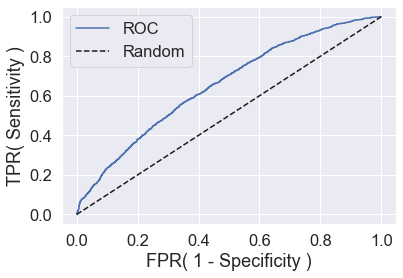

None
0.6538405292297254


In [1264]:
print("The ROC Curve for XGBoost")
print(roc_curve_plot(ytest, grid_xgb.predict_proba(xtest)[:, 1]))
print(roc_auc_score(ytest, grid_xgb.predict_proba(xtest)[:, 1]))

In [1259]:
# Neural Network
nn = MLPClassifier()
nn.fit(xtrain, ytrain)

MLPClassifier()

In [1260]:
pred_nn = nn.predict(xtest)
acc_nn = accuracy_score(ytest, pred_nn)
f1_nn = metrics.f1_score(ytest, pred_nn)

print("The Accuracy Score for Random Forest is: " + str(acc_nn))
print("The F1 Score for Random Forest is: " + str(f1_nn))

The Accuracy Score for Random Forest is: 0.694156378600823
The F1 Score for Random Forest is: 0.8104081632653061


The ROC Curve for Neural Network


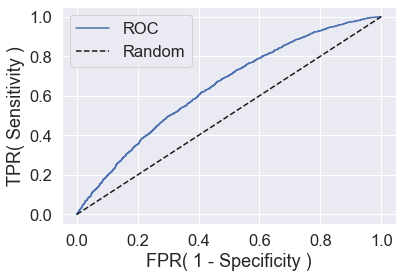

None
0.6431026438356472


In [1261]:
print("The ROC Curve for Neural Network")
print(roc_curve_plot(ytest, nn.predict_proba(xtest)[:, 1]))
print(roc_auc_score(ytest, nn.predict_proba(xtest)[:, 1]))

The ROC Curve for Neural Network


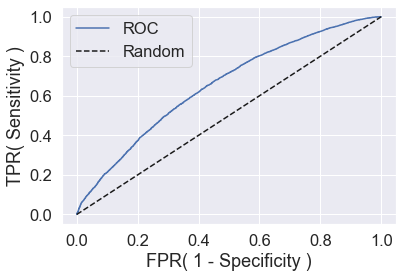

None
0.6527679791853336


In [97]:
print("The ROC Curve for Neural Network")
print(roc_curve_plot(ydata, grid_logreg.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_logreg.predict_proba(xdata)[:, 1]))

The ROC Curve for Neural Network


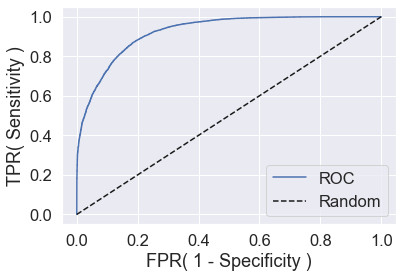

None
0.9244463211000458


In [98]:
print("The ROC Curve for Neural Network")
print(roc_curve_plot(ydata, grid_rf.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_rf.predict_proba(xdata)[:, 1]))

The ROC Curve for Neural Network


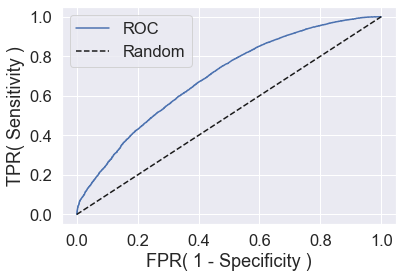

None
0.6927548719956244


In [99]:
print("The ROC Curve for Neural Network")
print(roc_curve_plot(ydata, grid_xgb.predict_proba(xdata)[:, 1]))
print(roc_auc_score(ydata, grid_xgb.predict_proba(xdata)[:, 1]))